<a href="https://colab.research.google.com/github/gizdatalab/DPPD_Niger/blob/main/model_and_deviance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DPPD Find positive outlier in crop yields in Niger 

## Positive Deviance

In every community or organisation, a few individuals or groups use uncommon practices and behaviours to achieve better solutions to problems than their peers who face the same challenges and barriers. Those individuals are referred to as Positive Deviants and adopting their solutions is referred to as the Positive Deviance (PD) approach.​

Successful application in rehabilitating 50,000 children in vietnam​

Application of PD has been reported in more than 60 countries across the globe.​

Applications include: enhancing school retention & pregnancy outcomes, eliminating neonatal mortality, limiting HIV transmission, fighting against FGM.

# Import and transform data

In [2]:
from google.colab import files
import pandas as pd
import numpy as np

uploaded = files.upload()


Saving niger_landcover_prop.xlsx to niger_landcover_prop.xlsx
Saving vill_savimax_mean.csv to vill_savimax_mean.csv
Saving vill_dependent_var_mean.csv to vill_dependent_var_mean.csv


In [3]:
!ls

niger_landcover_prop.xlsx  vill_dependent_var_mean.csv
sample_data		   vill_savimax_mean.csv


In [4]:
df1 = pd.read_csv('vill_savimax_mean.csv')
df2 = pd.read_csv('vill_dependent_var_mean.csv')
df3 = pd.read_excel('niger_landcover_prop.xlsx')

In [5]:
df1.columns

Index(['system:index', 'SS_GROUP', 'Surface', 'Village', 'savimax_2016',
       'savimax_2017', 'savimax_2018', 'savimax_2019', 'savimax_2020', '.geo'],
      dtype='object')

In [6]:
df2.columns

Index(['system:index', 'SS_GROUP', 'Surface', 'Village', 'et_mean_2016',
       'et_mean_2017', 'et_mean_2018', 'et_mean_2019', 'et_mean_2020',
       'et_sum_2016', 'et_sum_2016-06', 'et_sum_2016-07', 'et_sum_2016-08',
       'et_sum_2016-09', 'et_sum_2017', 'et_sum_2017-06', 'et_sum_2017-07',
       'et_sum_2017-08', 'et_sum_2017-09', 'et_sum_2018', 'et_sum_2018-06',
       'et_sum_2018-07', 'et_sum_2018-08', 'et_sum_2018-09', 'et_sum_2019',
       'et_sum_2019-06', 'et_sum_2019-07', 'et_sum_2019-08', 'et_sum_2019-09',
       'et_sum_2020', 'et_sum_2020-06', 'et_sum_2020-07', 'et_sum_2020-08',
       'et_sum_2020-09', 'pr_mean_2016', 'pr_mean_2017', 'pr_mean_2018',
       'pr_mean_2019', 'pr_mean_2020', 'pr_sum_2016', 'pr_sum_2016-06',
       'pr_sum_2016-07', 'pr_sum_2016-08', 'pr_sum_2016-09', 'pr_sum_2017',
       'pr_sum_2017-06', 'pr_sum_2017-07', 'pr_sum_2017-08', 'pr_sum_2017-09',
       'pr_sum_2018', 'pr_sum_2018-06', 'pr_sum_2018-07', 'pr_sum_2018-08',
       'pr_sum_2018-0

In [7]:
df3.columns

Index(['system:index', 'SS_GROUP', 'Surface', 'Village', 'class_111',
       'class_20', 'class_30', 'class_40', 'class_50', 'class_60', 'class_80',
       'class_90', 'total', '.geo'],
      dtype='object')

In [8]:
df = df1[['savimax_2016', 'savimax_2017', 'savimax_2018', 'savimax_2019', 'savimax_2020','Village']].merge(
    df2,on='Village')
#.merge(df3[['class_111', 'class_20', 'class_30', 'class_40', 'class_50', 'class_60', 'class_80', 'class_90', 'Village']],on='Village')
df.shape,df1.shape,df2.shape,df3.shape

((12093, 100), (12093, 10), (12093, 95), (12093, 14))

In [9]:
df[:2]

,savimax_2016,savimax_2017,savimax_2018,savimax_2019,savimax_2020,Village,system:index,SS_GROUP,Surface,et_mean_2016,et_mean_2017,et_mean_2018,et_mean_2019,et_mean_2020,et_sum_2016,et_sum_2016-06,et_sum_2016-07,et_sum_2016-08,et_sum_2016-09,et_sum_2017,et_sum_2017-06,et_sum_2017-07,et_sum_2017-08,et_sum_2017-09,et_sum_2018,et_sum_2018-06,et_sum_2018-07,et_sum_2018-08,et_sum_2018-09,et_sum_2019,et_sum_2019-06,et_sum_2019-07,et_sum_2019-08,et_sum_2019-09,et_sum_2020,et_sum_2020-06,et_sum_2020-07,et_sum_2020-08,et_sum_2020-09,pr_mean_2016,...,pr_sum_2019-06,pr_sum_2019-07,pr_sum_2019-08,pr_sum_2019-09,pr_sum_2020,pr_sum_2020-06,pr_sum_2020-07,pr_sum_2020-08,pr_sum_2020-09,ssm_mean_2016,ssm_mean_2017,ssm_mean_2018,ssm_mean_2019,ssm_mean_2020,ssm_sum_2016,ssm_sum_2016-06,ssm_sum_2016-07,ssm_sum_2016-08,ssm_sum_2016-09,ssm_sum_2017,ssm_sum_2017-06,ssm_sum_2017-07,ssm_sum_2017-08,ssm_sum_2017-09,ssm_sum_2018,ssm_sum_2018-06,ssm_sum_2018-07,ssm_sum_2018-08,ssm_sum_2018-09,ssm_sum_2019,ssm_sum_2019-06,ssm_sum_2019-07,ssm_sum_2019-08,ssm_sum_2019-09,ssm_sum_2020,ssm_sum_2020-06,ssm_sum_2020-07,ssm_sum_2020-08,ssm_sum_2020-09,.geo
0,0.621082,0.562682,0.710246,0.682512,0.599127,3579,0000000000000000015c,1,4.02469,27.777277,31.523259,78.407404,44.733353,28.982087,112.969491,0.144996,47.053971,116.338971,66.386461,123.651148,6.387355,66.590945,61.367564,61.374939,229.425552,0.217311,58.539666,108.045560,173.831867,232.960484,5.425798,NaN,168.713973,179.655604,52.384652,4.934188,26.293548,NaN,70.074974,3.207910,...,55.485201,140.555694,112.070532,74.175344,693.764393,89.677704,276.937441,193.556578,133.592670,5.020713,3.716997,8.123097,6.814147,7.078658,205.849231,35.479660,84.285560,55.189301,30.894710,152.396866,29.088206,53.260585,44.126295,25.92178,324.923863,68.115742,50.273313,131.312066,75.222742,279.380045,55.860946,51.159634,118.311729,54.047735,290.224982,42.459600,73.775492,112.495112,61.494777,"{""type"":""Polygon"",""coordinates"":[[[4.066436957..."
1,0.642015,0.563705,0.726874,0.726740,0.641721,3580,0000000000000000015d,1,7.63108,30.645388,34.201715,90.767392,48.796478,34.489905,98.054942,0.000000,86.052819,99.687305,58.138666,160.642585,7.136153,77.209442,68.444972,78.668465,222.846568,0.523935,60.738923,122.523942,192.785164,196.308545,4.015971,38.0,166.842442,180.622809,78.403109,4.509696,25.904002,44.0,72.300061,3.218027,...,55.636999,139.886774,112.025873,74.663685,695.243496,89.644945,276.763807,194.754427,134.080317,5.262048,4.047575,7.910503,6.635139,6.758908,215.743962,34.473096,82.518331,70.084963,28.667572,165.950580,27.765843,63.896032,45.823385,28.46532,316.420130,61.653400,50.358429,135.694943,68.713358,272.040697,51.579065,50.608455,112.329146,57.524031,277.115240,42.443498,68.820494,105.876517,59.974731,"{""type"":""Polygon"",""coordinates"":[[[4.070650005..."


In [10]:
def describe_full(df):
    #pd.options.display.float_format = '{:.2f}'.format
    dtypes_description=pd.DataFrame(dict(df.dtypes),["dtypes"])
    na_description = pd.DataFrame(dict(df.isna().sum()),["NA-s"])
    na_percent = ((pd.DataFrame(dict(df.isna().sum()),["NA%"])/len(df))*100).round(decimals=2)
    description = df.describe(include='all')
    full_description = dtypes_description.append(na_description).append(na_percent).append(description).replace(np.nan, '', regex=True)

    mask = full_description.loc["freq",:]==1
    full_description.at[["top"],mask.index[mask]]=""
    #TODO: scientific notation - could be nicer
    
    return full_description

In [11]:
describe_full(df)

,savimax_2016,savimax_2017,savimax_2018,savimax_2019,savimax_2020,Village,system:index,SS_GROUP,Surface,et_mean_2016,et_mean_2017,et_mean_2018,et_mean_2019,et_mean_2020,et_sum_2016,et_sum_2016-06,et_sum_2016-07,et_sum_2016-08,et_sum_2016-09,et_sum_2017,et_sum_2017-06,et_sum_2017-07,et_sum_2017-08,et_sum_2017-09,et_sum_2018,et_sum_2018-06,et_sum_2018-07,et_sum_2018-08,et_sum_2018-09,et_sum_2019,et_sum_2019-06,et_sum_2019-07,et_sum_2019-08,et_sum_2019-09,et_sum_2020,et_sum_2020-06,et_sum_2020-07,et_sum_2020-08,et_sum_2020-09,pr_mean_2016,...,pr_sum_2019-06,pr_sum_2019-07,pr_sum_2019-08,pr_sum_2019-09,pr_sum_2020,pr_sum_2020-06,pr_sum_2020-07,pr_sum_2020-08,pr_sum_2020-09,ssm_mean_2016,ssm_mean_2017,ssm_mean_2018,ssm_mean_2019,ssm_mean_2020,ssm_sum_2016,ssm_sum_2016-06,ssm_sum_2016-07,ssm_sum_2016-08,ssm_sum_2016-09,ssm_sum_2017,ssm_sum_2017-06,ssm_sum_2017-07,ssm_sum_2017-08,ssm_sum_2017-09,ssm_sum_2018,ssm_sum_2018-06,ssm_sum_2018-07,ssm_sum_2018-08,ssm_sum_2018-09,ssm_sum_2019,ssm_sum_2019-06,ssm_sum_2019-07,ssm_sum_2019-08,ssm_sum_2019-09,ssm_sum_2020,ssm_sum_2020-06,ssm_sum_2020-07,ssm_sum_2020-08,ssm_sum_2020-09,.geo
dtypes,float64,float64,float64,float64,float64,int64,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
NA-s,912,912,912,912,912,0,0,0,0,168,159,94,134,404,168,2447,1375,1636,1612,159,2391,2232,1598,728,94,3008,1821,1214,782,134,2227,1740,2605,837,404,3281,1569,4958,1594,0,...,0,0,0,0,0,0,0,0,0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
NA%,7.54,7.54,7.54,7.54,7.54,0,0,0,0,1.39,1.31,0.78,1.11,3.34,1.39,20.23,11.37,13.53,13.33,1.31,19.77,18.46,13.21,6.02,0.78,24.87,15.06,10.04,6.47,1.11,18.42,14.39,21.54,6.92,3.34,27.13,12.97,41,13.18,0,...,0,0,0,0,0,0,0,0,0,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0
count,11181,11181,11181,11181,11181,12093,12093,12093,12093,11925,11934,11999,11959,11689,11925,9646,10718,10457,10481,11934,9702,9861,10495,11365,11999,9085,10272,10879,11311,11959,9866,10353,9488,11256,11689,8812,10524,7135,10499,12093,...,12093,12093,12093,12093,12093,12093,12093,12093,12093,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12090,12093
unique,,,,,,,12093,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,12093
top,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
freq,,,,,,,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,...,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1
mean,0.507607,0.567885,0.589366,0.56063,0.583292,6046,,2.9876,19.8816,19.3912,21.4308,37.3378,22.8129,28.1929,79.1056,3.61794,26.2698,54.3067,43.9726,99.9479,8.81958,34.7367,58.6158,52.7731,135.205,7.93768,28.5134,97.4027,81.2853,82.7388,5.39789,16.1319,67.9115,55.6215,99.5233,3.59086,25.5024,71.86,85.5611,3.07283,...,59.686,117.739,179.099,54.3263,524.324,48.7613,174.611,200.154,100.798,5.30321,4.87292,6.34561,5.74395,6.58624,217.432,37.9501,72.165,66.8093,40.5074,199.79,35.5055,53.3327,70.0572,40.8941,253.825,45.3987,53.0502,93.0538,62.3219,235.502,35.5195,55.7918,96.4905,47.7002,270.036,28.5604,57.1112,116.77,67.5937,
std,0.142846,0.119919,0.121709,0.133144,0.118515,3491.09,,1.34916,29.7316,16.9441,17.2002,23.2438,19.0605,20.1177,108.72,5.96419,26.9761,45.9865,59.6627,147.811,17.4145,38.7248,50.7006,69.7409,15

In [12]:
years = ['2016','2017','2018','2019','2020']

In [13]:
villages_list = []
year_list = []
for year in years:
    villages_list += [df['Village'].iloc[i] for i in range(0,len(df))]
    year_list += [ year for i in range(0,len(df))]

In [14]:
# dictionary of lists  
dict_ = {'Village': villages_list, 'year': year_list}  
    
df_new = pd.DataFrame(dict_) 
df_new[:4]  

,Village,year
0,3579,2016
1,3580,2016
2,3581,2016
3,3582,2016


In [15]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [16]:
df_trans= pd.DataFrame()

for year in years:
    print(year)
    df_year = df[[col for col in df.columns if year in col]]
    df_year['year'] = [ year for i in range(0,len(df))] 
    df_year['Village'] = df['Village']
    df_year.columns = [col.replace(year,'').replace('-','') for col in df_year.columns]
    print(df_year.shape)
    df_new_year = df_new[df_new['year']==year].merge(df_year,on=['Village','year'],how='left')
    df_new_year[df_new_year['year'].isna()==False]
    #df_new_year = df_new_year.dropna()
    print('df_new',df_new.shape,'df_new_year',df_new_year.shape)
    df_trans = df_trans.append(df_new_year)
    print('df_trans',df_trans.shape)
    print()

2016
(12093, 21)
df_new (60465, 2) df_new_year (12093, 21)
df_trans (12093, 21)

2017
(12093, 21)
df_new (60465, 2) df_new_year (12093, 21)
df_trans (24186, 21)

2018
(12093, 21)
df_new (60465, 2) df_new_year (12093, 21)
df_trans (36279, 21)

2019
(12093, 21)
df_new (60465, 2) df_new_year (12093, 21)
df_trans (48372, 21)

2020
(12093, 21)
df_new (60465, 2) df_new_year (12093, 21)
df_trans (60465, 21)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [17]:
df_trans['year'].value_counts()

2018    12093
2020    12093
2017    12093
2019    12093
2016    12093
Name: year, dtype: int64

In [18]:
df_trans = df_trans.merge(df3[['class_111', 'class_20', 'class_30', 'class_40', 'class_50', 'class_60', 'class_80', 'class_90', 'Village']],on='Village')

In [19]:
describe_full(df_trans)

,Village,year,savimax_,et_mean_,et_sum_,et_sum_06,et_sum_07,et_sum_08,et_sum_09,pr_mean_,pr_sum_,pr_sum_06,pr_sum_07,pr_sum_08,pr_sum_09,ssm_mean_,ssm_sum_,ssm_sum_06,ssm_sum_07,ssm_sum_08,ssm_sum_09,class_111,class_20,class_30,class_40,class_50,class_60,class_80,class_90
dtypes,int64,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
NA-s,0,0,4560,959,959,13354,8737,12011,5553,0,0,0,0,0,0,15,15,15,15,15,15,0,0,0,0,0,0,0,0
NA%,0,0,7.54,1.59,1.59,22.09,14.45,19.86,9.18,0,0,0,0,0,0,0.02,0.02,0.02,0.02,0.02,0.02,0,0,0,0,0,0,0,0
count,60465,60465,55905,59506,59506,47111,51728,48454,54912,60465,60465,60465,60465,60465,60465,60450,60450,60450,60450,60450,60450,60465,60465,60465,60465,60465,60465,60465,60465
unique,,5,,,,,,,,,,,,,,,,,,,,,,,,,,,
top,,2018,,,,,,,,,,,,,,,,,,,,,,,,,,,
freq,,12093,,,,,,,,,,,,,,,,,,,,,,,,,,,
mean,6046,,0.561756,25.8357,99.3386,5.88988,26.1442,70.1648,63.8193,3.47722,424.221,57.8809,131.048,166.951,68.341,5.77039,235.317,36.5868,58.2902,88.6362,51.8035,0.00253171,0.0844629,0.349349,0.519711,0.00274166,0.0372677,0.000971816,0.00296396
std,3490.98,,0.130815,20.4968,132.512,11.1596,30.2499,52.7383,73.075,0.981883,119.79,24.5766,39.9418,53.0395,38.1144,1.80425,72.9665,11.0889,20.5639,38.8034,26.9104,0.011023,0.149695,0.329428,0.381477,0.0201319,0.104541,0.00843626,0.0244412
min,0,,0.120148,0,0,0,0,1,0,1.35486,165.293,1.69915,48.9031,51.1515,7.94632,2.77232,113.665,18.3612,22.314,26.0029,20.7582,0,0,0,0,0,0,0,0


In [20]:
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline

### Mean Evapotranspiration 

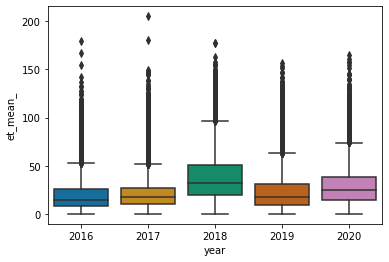

In [21]:
sns.boxplot(y='et_mean_', x='year', 
                 data=df_trans, 
                 palette="colorblind")
                 #hue='year')


### Mean Precipitation

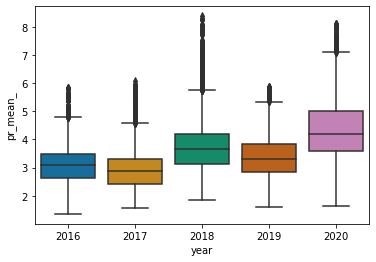

In [22]:
sns.boxplot(y='pr_mean_', x='year', 
                 data=df_trans, 
                 palette="colorblind")
                 #hue='year')


### Soil

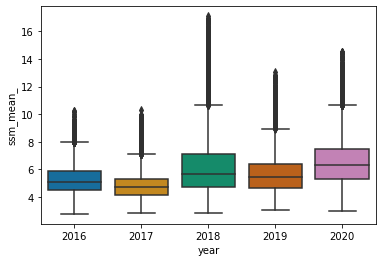

In [23]:
sns.boxplot(y='ssm_mean_', x='year', 
                 data=df_trans, 
                 palette="colorblind")
                 #hue='year')


# Max Savi

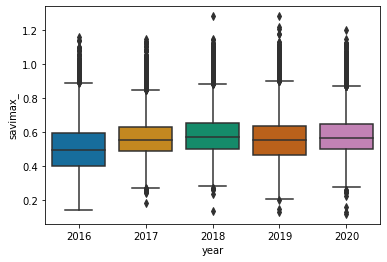

In [24]:
sns.boxplot(y='savimax_', x='year', 
                 data=df_trans, 
                 palette="colorblind")
                 #hue='year')


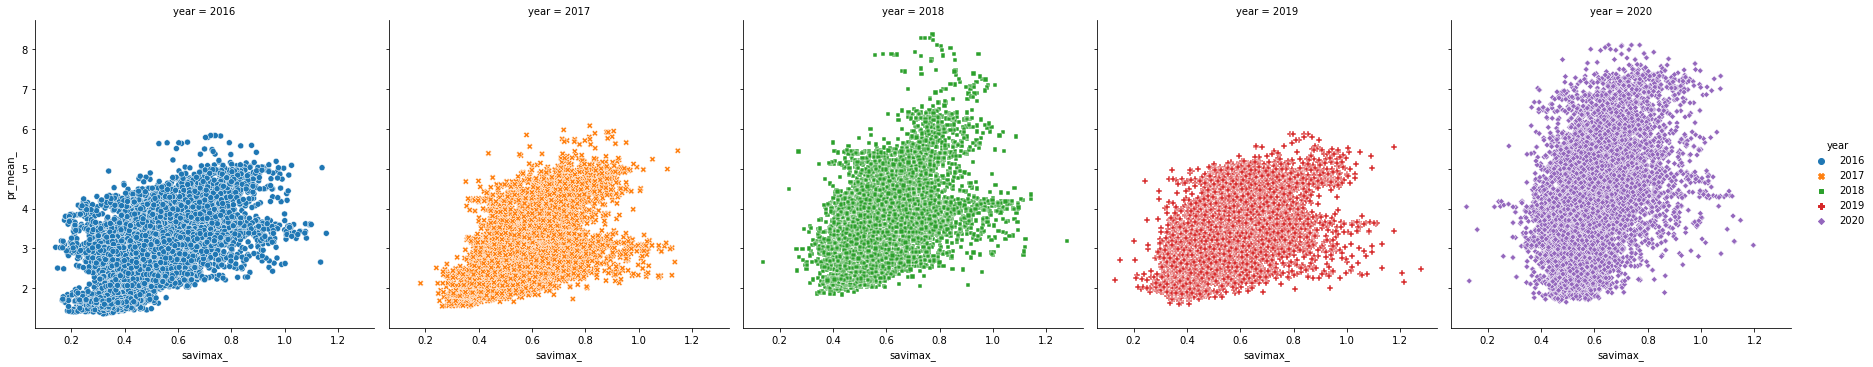

In [25]:
sns.relplot(
    data=df_trans, x="savimax_", y="pr_mean_",
    col="year", hue="year", style="year",
    kind="scatter"
)

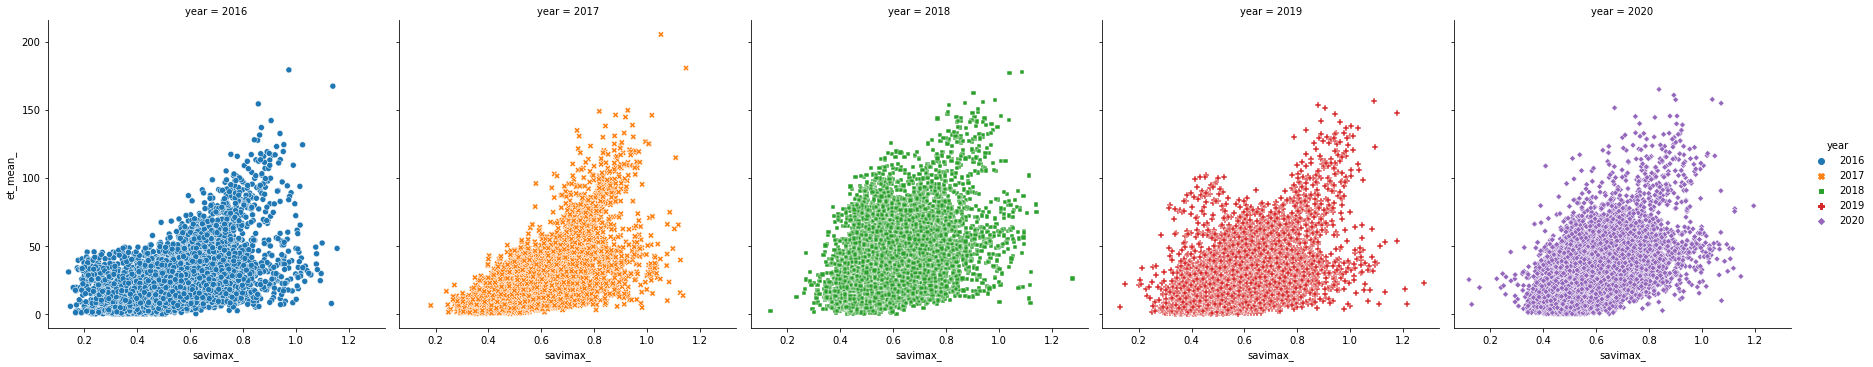

In [26]:
sns.relplot(
    data=df_trans, x="savimax_", y="et_mean_",
    col="year", hue="year", style="year",
    kind="scatter"
)

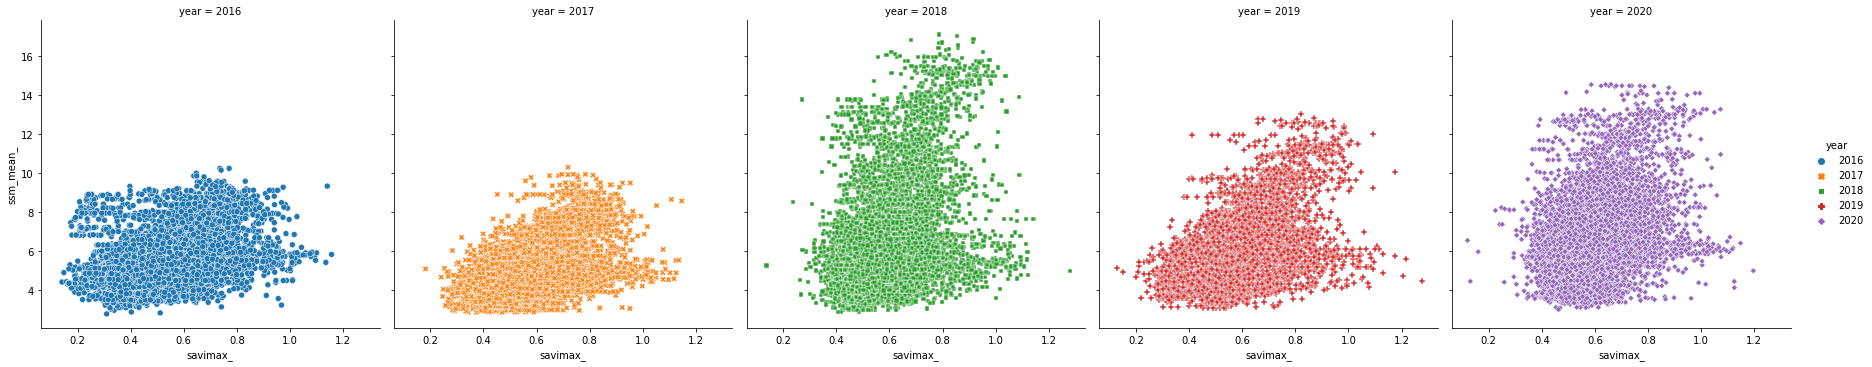

In [27]:
sns.relplot(
    data=df_trans, x="savimax_", y="ssm_mean_",
    col="year", hue="year", style="year",
    kind="scatter"
)

In [28]:
df_trans[['savimax_','pr_mean_','et_mean_','ssm_mean_']].corr()

,savimax_,pr_mean_,et_mean_,ssm_mean_
savimax_,1.000000,0.461101,0.540367,0.398291
pr_mean_,0.461101,1.000000,0.576427,0.720842
et_mean_,0.540367,0.576427,1.000000,0.502428
ssm_mean_,0.398291,0.720842,0.502428,1.000000


## Clustering

In [29]:
# for clustering:
from sklearn.cluster import KMeans
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec


In [30]:
df_trans[df_trans['et_mean_'].isna()==True].Village.value_counts()

11974    5
12056    5
11984    5
11985    5
11986    5
        ..
9837     1
9838     1
9839     1
627      1
11546    1
Name: Village, Length: 631, dtype: int64

(59501, 29)


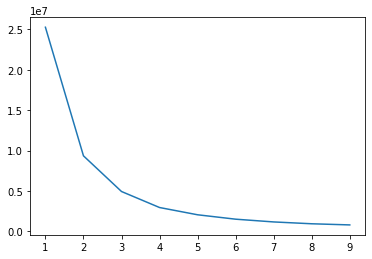

In [31]:
df_trans = df_trans[df_trans['et_mean_'].isna()==False]
df_trans = df_trans[df_trans['ssm_mean_'].isna()==False]
print(df_trans.shape)
clust_df = df_trans[['pr_mean_', 'et_mean_','ssm_mean_']].copy()
#clust_df = clust_df[clust_df['ev_mean_'].isna()==False]
max_k=10
wcss=[]

for k in range(1,max_k):
  kmeans = KMeans(k)
  kmeans.fit(clust_df)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_of_clusters = range(1,max_k)
plt.plot(number_of_clusters,wcss)

        A 2-cluster solution would look like this:


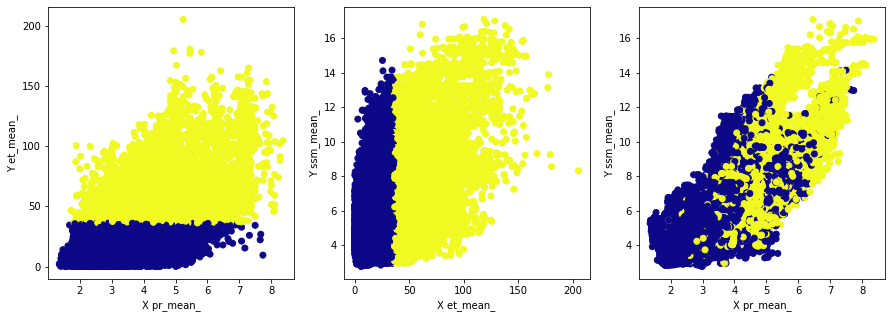

        A 3-cluster solution would look like this:


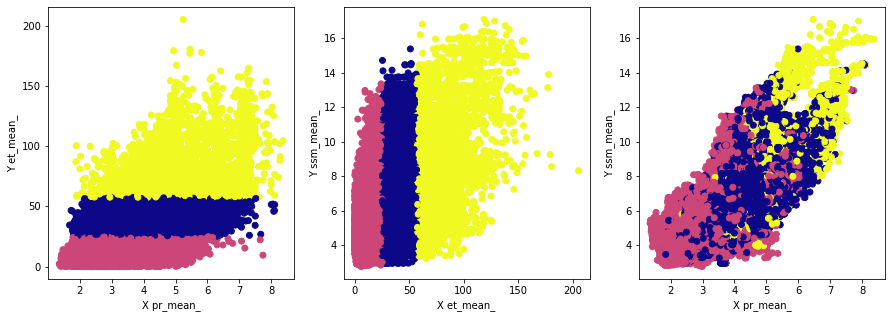

        A 4-cluster solution would look like this:


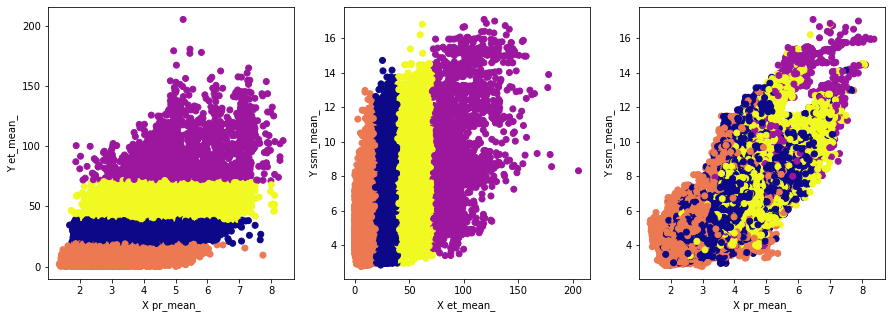

        A 5-cluster solution would look like this:


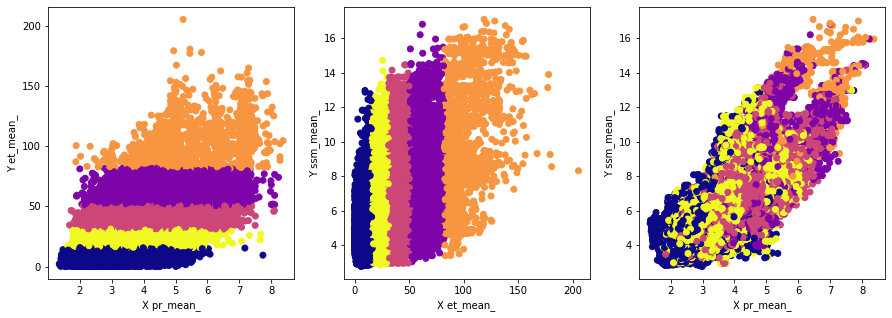

In [32]:
for k in range(2,6):
    kmeans = KMeans(k)
    identified_clusters = kmeans.fit_predict(clust_df)
    print('        A ' + str(k) +'-cluster solution would look like this:')
   # Create 2x2 sub plots
    gs = gridspec.GridSpec(1, 3)

    pl.figure(figsize=(15, 5))
    ax = pl.subplot(gs[0, 0]) # row 0, col 0
    pl.scatter(clust_df['pr_mean_'],clust_df['et_mean_'],
                c=identified_clusters,cmap='plasma')
    ax.set_xlabel('X pr_mean_')
    ax.set_ylabel('Y et_mean_')

    ax = pl.subplot(gs[0, 1]) # row 0, col 1
    pl.scatter(clust_df['et_mean_'],clust_df['ssm_mean_'],
                c=identified_clusters,cmap='plasma')
    ax.set_xlabel('X et_mean_')
    ax.set_ylabel('Y ssm_mean_')

    ax = pl.subplot(gs[0, 2]) # row 1, span all columns
    pl.scatter(clust_df['pr_mean_'],clust_df['ssm_mean_'],
                c=identified_clusters,cmap='plasma')
    ax.set_xlabel('X pr_mean_')
    ax.set_ylabel('Y ssm_mean_')

    pl.show()

In [33]:
kmeans = KMeans(5, random_state=42) 
#random state makes sure that cluster labels stay the same between executions
df_trans['cluster'] = kmeans.fit_predict(clust_df)
df_trans['cluster'].value_counts()

0    22596
3    19054
1    11403
4     5100
2     1348
Name: cluster, dtype: int64

## Regression

In [34]:
#for scaling/PCA:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
 
 #regression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [35]:
def scale_regress(X,Y,vars):
    #trian test split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
    #scale the data - Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_scaled = pd.DataFrame(scaler.transform(X_train), columns = vars)
    X_scaled.index = y_train.index
    # adding a constant
    X_scaled = sm.add_constant(X_scaled) 

    model = sm.OLS(y_train, X_scaled).fit()

    print_model = model.summary()
    print(print_model)

    X_scaled_test = pd.DataFrame(scaler.transform(X_test), columns = vars)
    X_scaled_test.index = y_test.index
    X_scaled_test = sm.add_constant(X_scaled_test)
    predictions_train = model.predict(X_scaled) 
    predictions_test = model.predict(X_scaled_test) 
    print('train MSE',round(mean_squared_error(y_train, predictions_train),3))
    print('test MSE',round(mean_squared_error(y_test, predictions_test),3))

In [36]:
df_trans.columns

Index(['Village', 'year', 'savimax_', 'et_mean_', 'et_sum_', 'et_sum_06',
       'et_sum_07', 'et_sum_08', 'et_sum_09', 'pr_mean_', 'pr_sum_',
       'pr_sum_06', 'pr_sum_07', 'pr_sum_08', 'pr_sum_09', 'ssm_mean_',
       'ssm_sum_', 'ssm_sum_06', 'ssm_sum_07', 'ssm_sum_08', 'ssm_sum_09',
       'class_111', 'class_20', 'class_30', 'class_40', 'class_50', 'class_60',
       'class_80', 'class_90', 'cluster'],
      dtype='object')

In [37]:
df_trans = df_trans[df_trans['savimax_'].isna()==False]

In [38]:
bund0 = ['et_sum_', 'pr_sum_','ssm_sum_']
bund1 = ['year', 'et_sum_', 'pr_sum_']
bund2 = ['year', 'et_mean_', 'pr_mean_']


X = df_trans[bund0]
Y = df_trans['savimax_']

scale_regress(X,Y,bund0)

                            OLS Regression Results                            
Dep. Variable:               savimax_   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                 1.478e+04
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:57:26   Log-Likelihood:                 46461.
No. Observations:               49538   AIC:                        -9.291e+04
Df Residuals:                   49534   BIC:                        -9.288e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5634      0.000   1323.687      0.0

In [39]:
bund0 = ['ev_mean_', 'pr_mean_']
bund1 = ['year', 'ev_sum_', 'pr_sum_']
bund2 = ['year', 'ev_mean_', 'pr_mean_']
bund3 = ['year','et_sum_06', 'et_sum_07','et_sum_08', 'et_sum_09','pr_sum_06', 'pr_sum_07','pr_sum_08', 'pr_sum_09','ssm_sum_06', 'ssm_sum_07', 'ssm_sum_08', 'ssm_sum_09']


X = df_trans[bund3].dropna()
Y = df_trans.dropna()['savimax_']

scale_regress(X,Y,bund3)

                            OLS Regression Results                            
Dep. Variable:               savimax_   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     2217.
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:57:26   Log-Likelihood:                 26612.
No. Observations:               29733   AIC:                        -5.320e+04
Df Residuals:                   29719   BIC:                        -5.308e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5951      0.001   1037.651      0.0

In [40]:
bund0 = ['year','et_sum_', 'pr_sum_','ssm_sum_','class_111', 'class_20', 'class_30', 'class_40', 'class_50', 'class_60', 'class_80']

X = df_trans[bund0]
Y = df_trans['savimax_']

scale_regress(X,Y,bund0)

                            OLS Regression Results                            
Dep. Variable:               savimax_   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     4334.
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:57:27   Log-Likelihood:                 47329.
No. Observations:               49538   AIC:                        -9.463e+04
Df Residuals:                   49526   BIC:                        -9.453e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5634      0.000   1346.986      0.0

In [41]:
bund0 = ['year','class_111', 'class_20', 'class_30', 'class_40', 'class_50', 'class_60', 'class_80']

X = df_trans[bund0]
Y = df_trans['savimax_']

scale_regress(X,Y,bund0)

                            OLS Regression Results                            
Dep. Variable:               savimax_   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     1663.
Date:                Wed, 27 Jan 2021   Prob (F-statistic):               0.00
Time:                        13:57:27   Log-Likelihood:                 36521.
No. Observations:               49538   AIC:                        -7.302e+04
Df Residuals:                   49529   BIC:                        -7.295e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5634      0.001   1082.994      0.0

## XGBoost

In [50]:
%%capture
!pip install shap
import shap
import xgboost
# load JS visualization code to notebook
shap.initjs()


In [44]:
df_trans = df_trans.merge(pd.get_dummies(data=df_trans['year'],prefix='year', drop_first=True),how='left', left_index=True, right_index=True)
df_trans.columns

Index(['Village', 'year', 'savimax_', 'et_mean_', 'et_sum_', 'et_sum_06',
       'et_sum_07', 'et_sum_08', 'et_sum_09', 'pr_mean_', 'pr_sum_',
       'pr_sum_06', 'pr_sum_07', 'pr_sum_08', 'pr_sum_09', 'ssm_mean_',
       'ssm_sum_', 'ssm_sum_06', 'ssm_sum_07', 'ssm_sum_08', 'ssm_sum_09',
       'class_111', 'class_20', 'class_30', 'class_40', 'class_50', 'class_60',
       'class_80', 'class_90', 'cluster', 'year__2017', 'year__2018',
       'year__2019', 'year__2020', 'year_2017', 'year_2018', 'year_2019',
       'year_2020'],
      dtype='object')

In [45]:
agg_y = ['et_sum_', 'pr_sum_','ssm_sum_']
years = [ 'year_2017', 'year_2018', 'year_2019', 'year_2020']
build_up = ['class_111', 'class_20', 'class_30', 'class_40', 'class_50', 'class_60', 'class_80']
agg_m = ['et_sum_06', 'et_sum_07','et_sum_08', 'et_sum_09','pr_sum_06', 'pr_sum_07','pr_sum_08', 'pr_sum_09','ssm_sum_06', 'ssm_sum_07', 'ssm_sum_08', 'ssm_sum_09']

vars = build_up + agg_m + years

X = df_trans[vars]
Y = df_trans['savimax_']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [61]:
# Various hyper-parameters to tune
from sklearn.model_selection import GridSearchCV

xgb1 = xgboost.XGBRegressor()
parameters = {'nthread':[-1], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.1], #so called `eta` value
              'max_depth': [ 8,10],
              'min_child_weight': [100],
             #'silent': [1],
              'reg_lambda':[.5],
              'reg_alpha':[.1,.3],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  6.5min finished


[15:17:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.7456711250940872
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 100, 'n_estimators': 500, 'nthread': -1, 'objective': 'reg:linear', 'reg_alpha': 0.3, 'reg_lambda': 0.5, 'subsample': 0.7}


In [62]:
import xgboost
dtrain = xgboost.DMatrix(X_train,y_train)
dtest = xgboost.DMatrix(X_test,y_test)
model = xgboost.XGBRegressor(colsample_bytree=.7,reg_alpha=.5,reg_lambda=.5,n_estimators=500,learning_rate=0.1,max_depth = 10)
#model = xgboost.XGBRegressor(colsample_bytree=.6,max_depth = 5,n_estimators=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print('train',mean_squared_error(y_train, y_pred)*100)

y_pred = model.predict(X_test)
print('test',mean_squared_error(y_test, y_pred)*100)

[15:20:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train 0.04203932443928441
test 0.3446532019676811


In [110]:
#import matplotlib.pylab as plt
#%matplotlib inline
#from matplotlib.pylab import rcParams
##set up the parameters
#rcParams['figure.figsize'] = 80,50
#xgboost.plot_tree(model, num_trees=5, rankdir='LR')

#plt.show()

In [51]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [ ]:
// orange: Shrub, (20)
// yellow: Herbaceous vegetation, (30)
// pink: Cultivated and managed vegetation / agriculture (40)
// red: Settlements (50)
// grey: bare/sparse vegetation (60)
// blue:  open water (80)
// turqoise: Herbaceous wetland (90)
// green/brown: Closed forest (111-126)


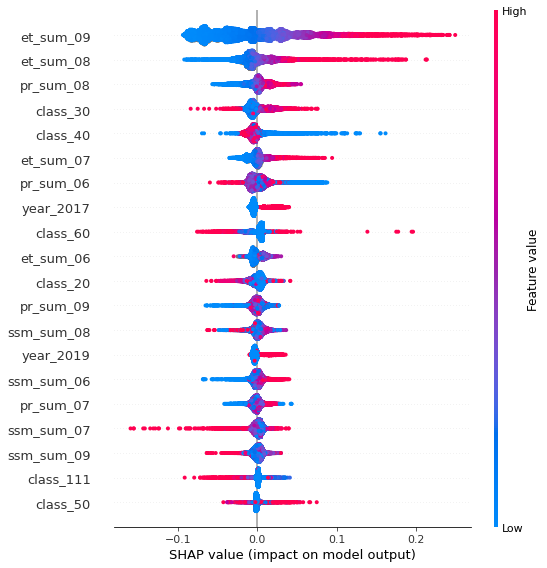

In [52]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_test)

In [ ]:
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print('train',mean_squared_error(y_train, y_pred)*100)

y_pred = model.predict(X_test)
print('test',mean_squared_error(y_test, y_pred)*100)

### NN

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [88]:
#vars = ['et_sum_', 'pr_sum_','ssm_sum_','class_111', 'class_20', 'class_30', 'class_40', 'class_50', 'class_60', 'class_80']
df_trans_nn = df_trans.dropna()
X = df_trans_nn[vars]
Y = df_trans_nn['savimax_']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
#scale the data - Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = pd.DataFrame(scaler.transform(X_train), columns = vars)
X_scaled.index = y_train.index

X_scaled_test = pd.DataFrame(scaler.transform(X_test), columns = vars)
X_scaled_test.index = y_test.index
#X_scaled_test = sm.add_constant(X_scaled_test)
#predictions_train = model.predict(X_scaled) 
#predictions_test = model.predict(X_scaled_test) 
#print('train MSE',round(mean_squared_error(y_train, predictions_train),3))
#print('test MSE',round(mean_squared_error(y_test, predictions_test),3))

In [90]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [
        layers.Dense(32, activation="relu", name="layer1"),
        layers.Dense(16, activation="relu", name="layer2"),
        layers.Dense(1,activation='linear', name="layer3"),
    ]
)


In [91]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

lr = .005
opt = Adam(lr=lr, decay=lr/50)

model.compile(loss='mean_squared_error',optimizer=opt)
#model.fit(X_scaled,y_train,epochs=20)

early_stopping = EarlyStopping(patience = 5)

hist = model.fit(x = X_scaled, y = y_train,\
                validation_data = (X_scaled_test, y_test), \
                epochs = 150, batch_size = 16, shuffle = True, \
                callbacks = [early_stopping])

Epoch 1/150
1859/1859 [==============================] - 3s 1ms/step - loss: 0.0329 - val_loss: 0.0081
Epoch 2/150
1859/1859 [==============================] - 3s 2ms/step - loss: 0.0082 - val_loss: 0.0073
Epoch 3/150
1859/1859 [==============================] - 3s 1ms/step - loss: 0.0081 - val_loss: 0.0071
Epoch 4/150
1859/1859 [==============================] - 3s 1ms/step - loss: 0.0080 - val_loss: 0.0069
Epoch 5/150
1859/1859 [==============================] - 3s 1ms/step - loss: 0.0076 - val_loss: 0.0070
Epoch 6/150
1859/1859 [==============================] - 3s 1ms/step - loss: 0.0074 - val_loss: 0.0071
Epoch 7/150
1859/1859 [==============================] - 3s 1ms/step - loss: 0.0073 - val_loss: 0.0067
Epoch 8/150
1859/1859 [==============================] - 3s 1ms/step - loss: 0.0071 - val_loss: 0.0068
Epoch 9/150
1859/1859 [==============================] - 3s 1ms/step - loss: 0.0071 - val_loss: 0.0067
Epoch 10/150
1859/1859 [==============================] - 3s 1ms/step - l

In [65]:
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(model.predict_proba, X_scaled, link="logit")
shap_values = explainer.shap_values(X_scaled_test, nsamples=100)

# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0,:], link="logit")

`model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.


Using 49538 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


KeyboardInterrupt: ignored

In [ ]:
shap_values = e.shap_values(x_test[1:5])

# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:5])

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)